# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [5]:
# Import your libraries
import pandas as pd
from scipy import stats
import numpy as np

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [19]:
# Your code here
mean = 50
std = 5
sample_size=[10, 50, 500, 5000]
random_sp_0 = np.random.normal(mean, std, sample_size[0])
stats.normaltest(random_sp_0)

/Users/alvaro/anaconda3/envs/py3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.7851733261488604, pvalue=0.6753078195647353)

In [20]:
random_sp_1 = np.random.normal(mean, std, sample_size[1])
stats.normaltest(random_sp_1)

NormaltestResult(statistic=1.2485589027987258, pvalue=0.5356472493769315)

In [21]:
random_sp_2 = np.random.normal(mean, std, sample_size[2])
stats.normaltest(random_sp_2)

NormaltestResult(statistic=0.08061333682147283, pvalue=0.9604948405563165)

In [28]:
random_sp_3 = np.random.normal(mean, std, sample_size[3])
stats.normaltest(random_sp_3)

NormaltestResult(statistic=0.5109792026022507, pvalue=0.7745371906976576)

#### Interpret the normaltest results and make your observations.

#### Explain the test results here
#### We can observe that the sample that is closer to a perfect normal distribution is the third one (500)

#### Step 2: Plot normal distributions

Use matplotlib to plot a histogram of each sample. 

*Hints:*

- Your outputs should look like below:

![normal distributions with different sample sizes](ch-1.png)

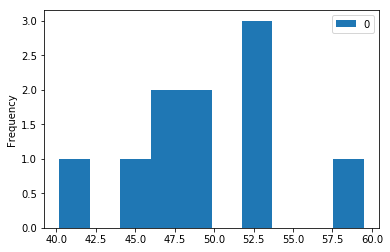

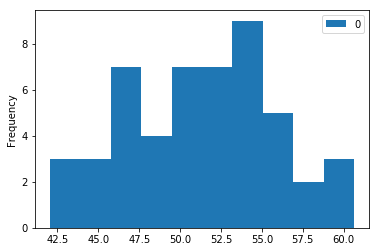

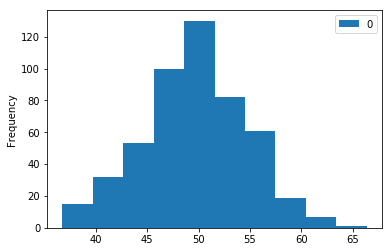

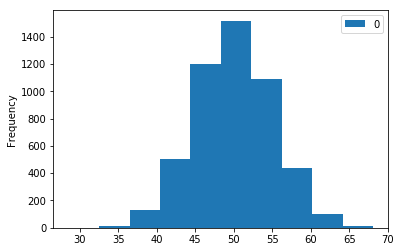

In [32]:
# Your code here
pd.DataFrame(random_sp_0).plot(kind='hist')
pd.DataFrame(random_sp_1).plot(kind='hist')
pd.DataFrame(random_sp_2).plot(kind='hist')
pd.DataFrame(random_sp_3).plot(kind='hist')

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

##### Your comment and explanation here
#### We can observe that the bigger the n the closer to the mean 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

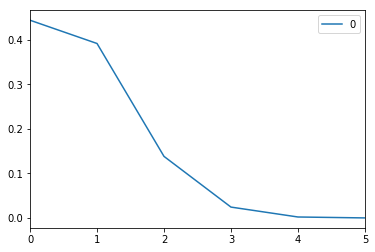

In [65]:
# Your code here
pd.DataFrame(stats.binom.pmf(range(0,6), 5, 0.15)).plot()

#### Explain what you observe from the plot above

#### Your comment here
#### The probability goes down as expected and the probablity of all of them watching the add is close to 0

#### Now plot PMP with 50, 500, and 5000 visitors.

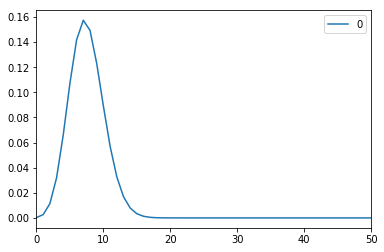

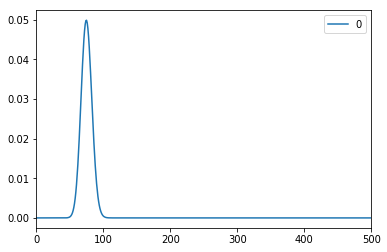

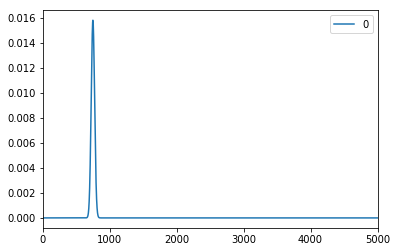

In [63]:
# Your code here
pd.DataFrame(stats.binom.pmf(range(0,51), 50, 0.15)).plot()
pd.DataFrame(stats.binom.pmf(range(0,501), 500, 0.15)).plot()
pd.DataFrame(stats.binom.pmf(range(0,5001), 5000, 0.15)).plot()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

##### Your comment here
##### Poisson distribution explains the occurrences of something in a certain amount of time 

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [42]:
# Your code here
stats.poisson.pmf(320,300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [46]:
# Your code here
stats.poisson.pmf(60,300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

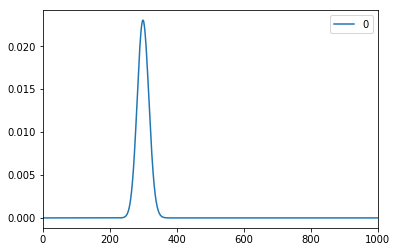

In [64]:
pd.DataFrame(stats.poisson.pmf(range(0,1001),300)).plot()

# Challenge 4 - Central Limit Theorem

#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [119]:
mu = 35
stdev = 8
n_pkge = 200 
sigma = stdev / n_pkge ** 0.5

stats.norm.cdf(35, mu, sigma) - stats.norm.cdf(30, mu, sigma)

0.5

#### b. What is the probablity that in total, it takes more than 115 hours to deliver all 200 packages?

In [121]:
time = 115 * 60
time_x_pkge = time / n_pkge
time_x_pkge

1 - stats.norm.cdf(time_x_pkge, mu, sigma)

0.8116204410942089